<img src='https://www.shutterstock.com/image-illustration/block-chain-network-concept-big-600nw-1165596400.jpg' width="700">

We've built a bunch of convolutional neural networks from scratch and they all seem to be learning, however, there is still plenty of room for improvement.

To improve our model(s), we could spend a while trying different configurations, adding more layers, changing the learning rate, adjusting the number of neurons per layer and more.

However, doing this is very time consuming.

Luckily, there's a technique we can use to save time.

It's called **transfer learning**, in other words, taking the patterns (also called weights) another model has learned from another problem and using them for our own problem.

There are two main benefits to using transfer learning:

1. Can leverage an existing neural network architecture proven to work on problems similar to our own.
2. Can leverage a working neural network architecture which **has already learned** patterns on similar data to our own. This often results in achieving great results with less custom data.

What this means is, instead of hand-crafting our own neural network architectures or building them from scratch, we can utilise models which have worked for others.

And instead of training our own models from scratch on our own datasets, we can take the patterns a model has learned from datasets such as [ImageNet](http://www.image-net.org//) (millions of images of different objects) and use them as the foundation of our own. Doing this often leads to getting great results with less data.

Over the next few notebooks, we'll see the power of transfer learning in action.

# Definição no Gemini

***O que é Transfer Learning?***

Imagine que você já aprendeu a dirigir um carro. Ao aprender a dirigir um caminhão, você não precisa recomeçar do zero. Você já possui um conhecimento base sobre direção que pode ser aplicado a um novo veículo. O transfer learning no aprendizado de máquina funciona de forma similar. Em vez de treinar um modelo completamente novo para uma tarefa, reutilizamos um modelo pré-treinado em uma grande quantidade de dados para uma tarefa relacionada.

No contexto do TensorFlow, o transfer learning envolve pegar um modelo pré-treinado, como um modelo de classificação de imagens, e adaptá-lo para uma nova tarefa. Por exemplo, um modelo treinado para identificar diferentes raças de cães pode ser adaptado para identificar diferentes tipos de tumores em imagens médicas.

***Por que usar Transfer Learning?***

* **Economia de tempo e recursos computacionais:** Treinar um modelo de deep learning do zero pode ser extremamente demorado e exigir grande poder computacional. Ao reutilizar um modelo pré-treinado, podemos acelerar significativamente o processo de desenvolvimento.
* **Melhores resultados com menos dados:** Modelos pré-treinados já aprenderam características gerais dos dados, como bordas, texturas e formas. Ao ajustar esse modelo para uma nova tarefa, podemos obter resultados melhores, mesmo com conjuntos de dados menores.
* **Tarefas complexas com poucos dados:** Em muitas áreas, como a medicina, é difícil obter grandes conjuntos de dados rotulados. O transfer learning permite abordar tarefas complexas com conjuntos de dados relativamente pequenos.

***Exemplo Prático:***

Suponha que você queira criar um classificador de imagens de plantas. Você pode utilizar um modelo pré-treinado como o VGG16, que foi treinado no conjunto de dados ImageNet, contendo milhões de imagens de diferentes objetos. Você congelaria as camadas iniciais do VGG16 e adicionaria uma nova camada de saída com o número de classes correspondente aos tipos de plantas que você deseja classificar. Em seguida, você treinaria o modelo com o seu conjunto de dados de plantas.

***Quando usar Transfer Learning?***

* **Seus dados são semelhantes aos dados usados para treinar o modelo pré-treinado:** Quanto mais semelhantes os dados, melhor será o desempenho do transfer learning.
* **Você possui um conjunto de dados limitado:** O transfer learning é particularmente útil quando se tem poucos dados.
* **A tarefa é complexa e requer um modelo grande:** Modelos pré-treinados podem fornecer uma base sólida para tarefas complexas.

***Em resumo:***

O transfer learning é uma técnica poderosa que permite acelerar o desenvolvimento de modelos de deep learning e obter melhores resultados com menos dados. Ao aproveitar o conhecimento prévio de modelos já treinados, podemos abordar uma variedade de tarefas complexas em diferentes domínios

# What we're going to cover

We're going to go through the following with TensorFlow:

* Introduce transfer learning (a way to beat all of our old self-built models)
* Using a smaller dataset to experiment faster (10% of training samples of 10 classes of food)
* Build a transfer learning feature extraction model using TensorFlow Hub
* Introduce the TensorBoard callback to track model training results
* Compare model results using TensorBoard

# Import Statements

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile
import os
import datetime
import pathlib
import numpy as np

# Transfer learning with TensorFlow Hub: Getting great results with 10% of the data

If you've been thinking, "*surely someone else has spent the time crafting the right model for the job...*" then you're in luck.

For many of the problems you'll want to use deep learning for, chances are, a working model already exists.

And the good news is, you can access many of them on TensorFlow Hub.

[TensorFlow Hub](https://tfhub.dev/) is a repository for existing model components. It makes it so you can import and use a fully trained model with as little as a URL.

Now, I really want to demonstrate the power of transfer learning to you.

To do so, what if I told you we could get much of the same results (or better) than our best model has gotten so far with only 10% of the original data, in other words, 10x less data.

This seems counterintuitive right?

Wouldn't you think more examples of what a picture of food looked like led to better results?

And you'd be right if you thought so, generally, more data leads to better results.

However, what if you didn't have more data? What if instead of 750 images per class, you had 75 images per class?

Collecting 675 more images of a certain class could take a long time.

So this is where another major benefit of transfer learning comes in.

**Transfer learning often allows you to get great results with less data.**

But don't just take my word for it. Let's download a subset of the data we've been using, namely 10% of the training data from the `10_food_classes` dataset and use it to train a food image classifier on.

<img src='https://camo.githubusercontent.com/15b4cdcc71adc71306b7e5de999e21a0611b65608ba498c43db29b3285a1425c/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30342d7472616e736665722d6c6561726e696e672d666561747572652d65787472616374696f6e2e706e67'>
<i>What we're working towards building. Taking a pre-trained model and adding our own custom layers on top, extracting all of the underlying patterns learned on another dataset our own images.</i>

In [2]:
# Get data (10% of labels)
# import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-10-17 21:43:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 142.250.99.207, 173.194.202.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  83.2MB/s    in 1.9s    

2024-10-17 21:43:42 (83.2 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# How many images in each folder?
# import os

# Walk through 10 percent data directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/gri

Notice how each of the training directories now has 75 images rather than 750 images. This is key to demonstrating how well transfer learning can perform with less labelled images.

The test directories still have the same amount of images. This means we'll be training on less data but evaluating our models on the same amount of test data.

# Creating data loaders (preparing the data)

Now we've downloaded the data, let's use the `ImageDataGenerator` class along with the `flow_from_directory` method to load in our images.

In [4]:
# Setup data inputs
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # thanks to pathlib
print(class_names)

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=IMAGE_SHAPE,
                                              batch_size=BATCH_SIZE,
                                              class_mode="categorical")

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


Excellent! Loading in the data we can see we've got 750 images in the training dataset belonging to 10 classes (75 per class) and 2500 images in the test set belonging to 10 classes (250 per class).

# Setting up callbacks (things to run whilst our model trains)

Before we build a model, there's an important concept we're going to get familiar with because it's going to play a key role in our future model building experiments.

And that concept is **callbacks**.

[Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks) are extra functionality you can add to your models to be performed during or after training. Some of the most popular callbacks include:

* [Experiment tracking with TensorBoard](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard) - log the performance of multiple models and then view and compare these models in a visual way on [TensorBoard](https://www.tensorflow.org/tensorboard) (a dashboard for inspecting neural network parameters). Helpful to compare the results of different models on your data.
* [Model checkpointing](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint) - save your model as it trains so you can stop training if needed and come back to continue off where you left. Helpful if training takes a long time and can't be done in one sitting.
* [Early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - leave your model training for an arbitrary amount of time and have it stop training automatically when it ceases to improve. Helpful when you've got a large dataset and don't know how long training will take.

We'll explore each of these overtime but for this notebook, we'll see how the TensorBoard callback can be used.

The TensorBoard callback can be accessed using [`tf.keras.callbacks.TensorBoard()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/TensorBoard).

Its main functionality is saving a model's training performance metrics to a specified `log_dir`.

By default, logs are recorded every epoch using the `update_freq='epoch'` parameter. This is a good default since tracking model performance too often can slow down model training.

To track our modelling experiments using TensorBoard, let's create a function which creates a TensorBoard callback for us.

> 🔑 **Note:** We create a function for creating a TensorBoard callback because as we'll see later on, each model needs its own TensorBoard callback instance (so the function will create a new one each time it's run).

In [5]:
# Create tensorboard callback (functionized because need to create a new one for each model)
# import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

Because you're likely to run multiple experiments, it's a good idea to be able to track them in some way.

In our case, our function saves a model's performance logs to a directory named `[dir_name]/[experiment_name]/[current_timestamp]`, where:

* `dir_name` is the overall logs directory
* `experiment_name` is the particular experiment
* `current_timestamp` is the time the experiment started based on Python's `datetime.datetime().now()`

> 🔑 **Note:** Depending on your use case, the above experimenting tracking naming method may work or you might require something more specific. The good news is, the TensorBoard callback makes it easy to track modelling logs as long as you specify where to track them. So you can get as creative as you like with how you name your experiments, just make sure you or your team can understand them.

# Creating models using TensorFlow Hub

State of the art means that at some point, both of these models have achieved the lowest error rate on [ImageNet (ILSVRC-2012-CLS)](http://www.image-net.org/), the gold standard of computer vision benchmarks.

> 🤔 **Question:** *I thought we were doing image classification, why do we choose feature vector and not classification?*

Great observation. This is where the differnet types of transfer learning come into play, as is, feature extraction and fine-tuning.

1. **"As is" transfer learning** is when you take a pretrained model as it is and apply it to your task without any changes.
* For example, many computer vision models are pretrained on the ImageNet dataset which contains 1000 different classes of images. This means passing a single image to this model will produce 1000 different prediction probability values (1 for each class).
  * This is helpful if you have 1000 classes of image you'd like to classify and they're all the same as the ImageNet classes, however, it's not helpful if you want to classify only a small subset of classes (such as 10 different kinds of food). Model's with `"/classification"` in their name on TensorFlow Hub provide this kind of functionality.
2. **Feature extraction transfer learning** is when you take the underlying patterns (also called weights) a pretrained model has learned and adjust its outputs to be more suited to your problem.
* For example, say the pretrained model you were using had 236 different layers (EfficientNetB0 has 236 layers), but the top layer outputs 1000 classes because it was pretrained on ImageNet. To adjust this to your own problem, you might remove the original activation layer and replace it with your own but with the right number of output classes. The important part here is that **only the top few layers become trainable, the rest remain frozen**.

  * This way all the underlying patterns remain in the rest of the layers and you can utilise them for your own problem. This kind of transfer learning is very helpful when your data is similar to the data a model has been pretrained on.
3. **Fine-tuning transfer learning** is when you take the underlying patterns (also called weights) of a pretrained model and adjust (fine-tune) them to your own problem.
* This usually means training **some, many or all** of the layers in the pretrained model. This is useful when you've got a large dataset (e.g. 100+ images per class) where your data is slightly different to the data the original model was trained on.

A common workflow is to "freeze" all of the learned patterns in the bottom layers of a pretrained model so they're untrainable. And then train the top 2-3 layers of so the pretrained model can adjust its outputs to your custom data (**feature extraction**).

After you've trained the top 2-3 layers, you can then gradually "unfreeze" more and more layers and run the training process on your own data to further **fine-tune** the pretrained model.

> 🤔 **Question:** *Why train only the top 2-3 layers in feature extraction?*

The lower a layer is in a computer vision model as in, the closer it is to the input layer, the larger the features it learn. For example, a bottom layer in a computer vision model to identify images of cats or dogs might learn the outline of legs, where as, layers closer to the output might learn the shape of teeth. Often, you'll want the larger features (learned patterns are also called features) to remain, since these are similar for both animals, where as, the differences remain in the more fine-grained features.

<img src='https://camo.githubusercontent.com/e2a1f0a8929da764eb233e93be3447eb636e3229ee40be3ea18581698b25518d/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30342d646966666572656e742d6b696e64732d6f662d7472616e736665722d6c6561726e696e672e706e67'>
<i>The different kinds of transfer learning. An original model, a feature extraction model (only top 2-3 layers change) and a fine-tuning model (many or all of original model get changed).</i>

Since we're going to be comparing two models, to save ourselves code, we'll create a function `create_model()`.

In [34]:
def create_model_with_mobilenetv2(num_classes):
  """
    Cria um modelo Keras Sequential com MobileNetV2 como extrator de recursos.

    Args:
        num_classes (int): Número de neurônios na camada de saída, deve ser igual ao número de classes alvo, padrão 10.

    Returns:
        Um modelo Keras Sequential não compilado com MobileNetV2 como camada de extração de recursos
        e uma camada Dense de saída com num_classes saídas.
    """
  # Load the EfficientNetV2B0 model with weights pre-trained on ImageNet
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet',
                                                 include_top=False,
                                                 input_shape=(224, 224, 3))

  base_model.trainable = False

  # Add a new classification head
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  predictions = tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

  # Create the new model
  model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  return model

In [7]:
def create_model_with_inceptionv3(num_classes):
  """
    Cria um modelo Keras Sequential com InceptionV3 como extrator de recursos.

    Args:
        num_classes (int): Número de neurônios na camada de saída, deve ser igual ao número de classes alvo, padrão 10.

    Returns:
        Um modelo Keras Sequential não compilado com InceptionV3 como camada de extração de recursos
        e uma camada Dense de saída com num_classes saídas.
    """
  # Load the EfficientNetV2B0 model with weights pre-trained on ImageNet
  base_model = tf.keras.applications.InceptionV3(weights='imagenet',
                                                 include_top=False,
                                                 input_shape=(224, 224, 3))

  base_model.trainable = False

  # Add a new classification head
  x = base_model.output
  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Dense(128, activation='relu')(x)
  x = tf.keras.layers.Dropout(0.2)(x)
  predictions = tf.keras.layers.Dense(num_classes, activation='softmax', name='output_layer')(x)

  # Create the new model
  model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  return model

In [8]:
# Create model
mobilenetv2_model = create_model_with_mobilenetv2(num_classes=train_data_10_percent.num_classes)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
mobilenetv2_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [10]:
inceptionv3_model = create_model_with_inceptionv3(num_classes=train_data_10_percent.num_classes)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [11]:
inceptionv3_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 111, 111, 32)   │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 111, 111, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 32)   │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 109, 109, 32)   │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 109, 109, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 109, 109, 64)   │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 109, 109, 64)   │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 109, 109, 64)   │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 54, 54, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 54, 54, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 54, 54, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 52, 52, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 52, 52, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 22,066,346 (84.18 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

<img src='https://camo.githubusercontent.com/7af9b1df8e578b3782b3d439363210837ccd55cba80af393b982eaadd710dfb6/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f30342d7265736e65742d666561747572652d657874726163746f722e706e67'>
<i>What our current model looks like. A ResNet50V2 backbone with a custom dense layer on top (10 classes instead of 1000 ImageNet classes). Note: The Image shows ResNet34 instead of ResNet50. Image source: https://arxiv.org/abs/1512.03385.</i>

We've got the training data ready in `train_data_10_percent` as well as the test data saved as `test_data`.

But before we call the fit function, there's one more thing we're going to add, a callback. More specifically, a TensorBoard callback so we can track the performance of our model on TensorBoard.

We can add a callback to our model by using the callbacks parameter in the fit function.

In our case, we'll pass the callbacks parameter the `create_tensorboard_callback()` we created earlier with some specific inputs so we know what experiments we're running.

Let's keep this experiment short and train for 5 epochs.

In [12]:
# Fit the model
mobilenet_history = mobilenetv2_model.fit(train_data_10_percent,
                                          epochs=5,
                                          validation_data=test_data,
                                          # Add TensorBoard callback to model (callbacks parameter takes a list)
                                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                               experiment_name="mobilenet")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/mobilenet/20241017-214400
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24/24 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.2727 - loss: 2.2623 - val_accuracy: 0.6360 - val_loss: 1.1117
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 547ms/step - accuracy: 0.6771 - loss: 0.9591 - val_accuracy: 0.7436 - val_loss: 0.7668
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 425ms/step - accuracy: 0.8490 - loss: 0.5599 - val_accuracy: 0.7760 - val_loss: 0.6799
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 523ms/step - accuracy: 0.8977 - loss: 0.3907 - val_accuracy: 0.7844 - val_loss: 0.6592
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 381ms/step - accuracy: 0.9403 - loss: 0.2737 - val_accuracy: 0.7788 - val_loss: 0.6599


It seems that after only 5 epochs, the MobileNetV2 feature extraction model was able to blow any of the architectures we made out of the water, achieving around 91% accuracy on the training set and nearly 80% accuracy on the test set...with only 10 percent of the training images!

That goes to show the power of transfer learning. And it's one of the main reasons whenever you're trying to model your own datasets, you should look into what pretrained models already exist.

Let's check out our model's training curves using our plot_loss_curves function.

In [13]:
# If you wanted to, you could really turn this into a helper function to load in with a helper.py script...
import matplotlib.pyplot as plt

# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

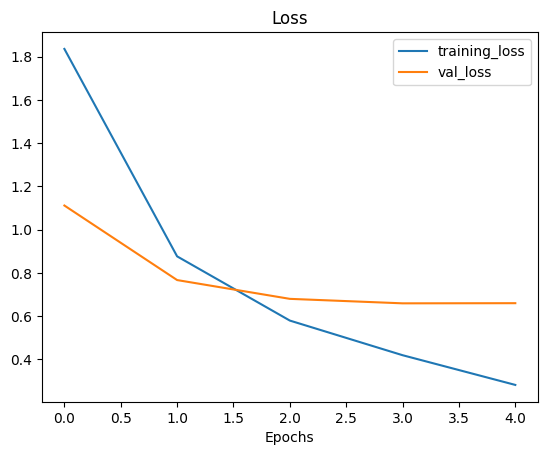

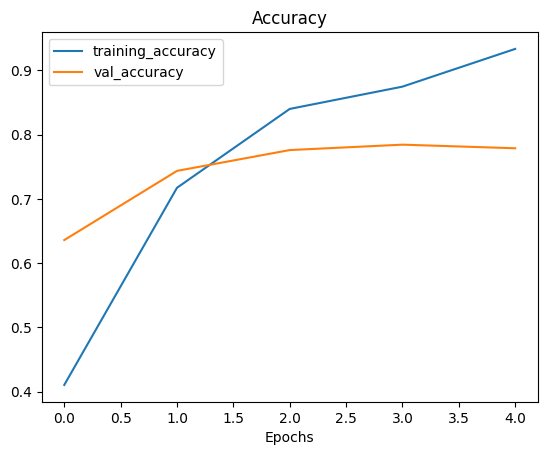

In [14]:
plot_loss_curves(mobilenet_history)

In [15]:
# Fit the model
inception_history = inceptionv3_model.fit(train_data_10_percent,
                                          epochs=5,
                                          validation_data=test_data,
                                          # Add TensorBoard callback to model (callbacks parameter takes a list)
                                          callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                                 experiment_name="inception")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/inception/20241017-214558
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3430 - loss: 2.0667 - val_accuracy: 0.6768 - val_loss: 0.9636
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 16s 525ms/step - accuracy: 0.6667 - loss: 0.9884 - val_accuracy: 0.7236 - val_loss: 0.8116
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 17s 363ms/step - accuracy: 0.7766 - loss: 0.7078 - val_accuracy: 0.7372 - val_loss: 0.7753
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 371ms/step - accuracy: 0.8129 - loss: 0.5853 - val_accuracy: 0.7768 - val_loss: 0.6553
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 23s 974ms/step - accuracy: 0.8669 - loss: 0.4169 - val_accuracy: 0.7720 - val_loss: 0.6825


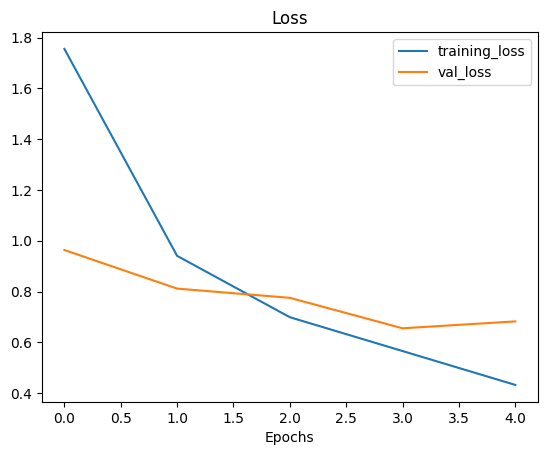

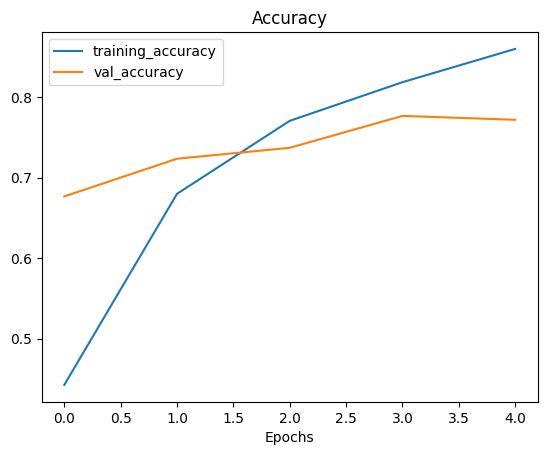

In [16]:
plot_loss_curves(inception_history)

In [17]:
# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [18]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.

  return img

In [19]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


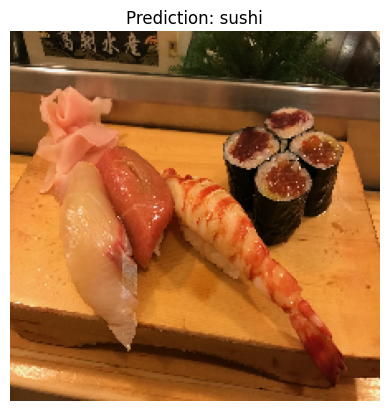

In [20]:
pred_and_plot(model=mobilenetv2_model,
              filename="/content/03-sushi.jpeg",
              class_names=class_names)

In [21]:
pred_and_plot(model=inceptionv3_model,
              filename="/content/Imagem WhatsApp 2024-10-16 às 15.06.12_e6ac67cf.jpg",
              class_names=class_names)

NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /content/Imagem WhatsApp 2024-10-16 às 15.06.12_e6ac67cf.jpg; No such file or directory [Op:ReadFile]

In [ ]:
mobilenetv2_model.save("mobilenetv2_model.keras")

# Praticar

## 1: Carregar a data augmentation

In [22]:
# import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-10-17 21:48:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   199MB/s    in 2.5s    

2024-10-17 21:48:23 (199 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [35]:
# Setup data inputs
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names_all = np.array(sorted([item.name for item in data_dir.glob('*')])) # thanks to pathlib
print(class_names_all)

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

train_datagen_all = ImageDataGenerator(rescale=1/255.,
                                       rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                       shear_range=0.2, # shear the image
                                       zoom_range=0.2, # zoom into the image
                                       width_shift_range=0.2, # shift the image width ways
                                       height_shift_range=0.2, # shift the image height ways
                                       horizontal_flip=True) # flip the image on the horizontal axis)

test_datagen_all = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_all = train_datagen_all.flow_from_directory(train_dir,
                                                       target_size=IMAGE_SHAPE,
                                                       batch_size=BATCH_SIZE,
                                                       class_mode="categorical")

print("Testing images:")
test_data_all = train_datagen_all.flow_from_directory(test_dir,
                                                      target_size=IMAGE_SHAPE,
                                                      batch_size=BATCH_SIZE,
                                                      class_mode="categorical")

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']
Training images:
Found 7500 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


In [44]:
# Create model
mobilenetv2_model_all = create_model_with_mobilenetv2(num_classes=train_data_all.num_classes)

In [46]:
# Fit the model
mobilenet_history_all = mobilenetv2_model_all.fit(train_data_all,
                                                  epochs=5,
                                                  validation_data=test_data_all,
                                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                                         experiment_name="mobilenet_all")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/mobilenet_all/20241017-221434
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 147s 580ms/step - accuracy: 0.5421 - loss: 1.4182 - val_accuracy: 0.7684 - val_loss: 0.6872
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 125s 518ms/step - accuracy: 0.7223 - loss: 0.8308 - val_accuracy: 0.8008 - val_loss: 0.6064
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 520ms/step - accuracy: 0.7581 - loss: 0.7293 - val_accuracy: 0.8060 - val_loss: 0.5778
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 151s 561ms/step - accuracy: 0.7814 - loss: 0.6700 - val_accuracy: 0.8068 - val_loss: 0.5735
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 132s 547ms/step - accuracy: 0.7769 - loss: 0.6638 - val_accuracy: 0.8132 - val_loss: 0.5557


In [57]:
mobilenetv2_model_all.save("mobilenetv2_model_all.keras")

In [69]:
inceptionv3_model_all.save("inceptionv3_model_all.keras")

In [60]:
model1 = tf.keras.models.load_model("mobilenetv2_model_all.keras")

In [58]:
mobilenetv2_model_all.fit(train_data_all, epochs=5, validation_data=test_data_all)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 130s 545ms/step - accuracy: 0.7934 - loss: 0.6073 - val_accuracy: 0.7972 - val_loss: 0.5868
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 518ms/step - accuracy: 0.8053 - loss: 0.5739 - val_accuracy: 0.8040 - val_loss: 0.5960
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 519ms/step - accuracy: 0.8081 - loss: 0.5586 - val_accuracy: 0.8144 - val_loss: 0.5260
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 514ms/step - accuracy: 0.8162 - loss: 0.5391 - val_accuracy: 0.8100 - val_loss: 0.5608
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 513ms/step - accuracy: 0.8231 - loss: 0.5285 - val_accuracy: 0.8100 - val_loss: 0.5799


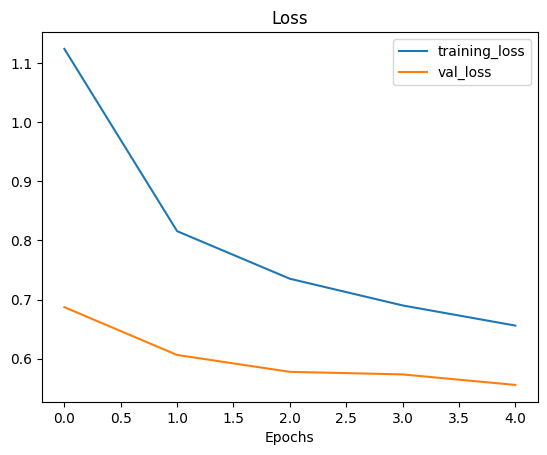

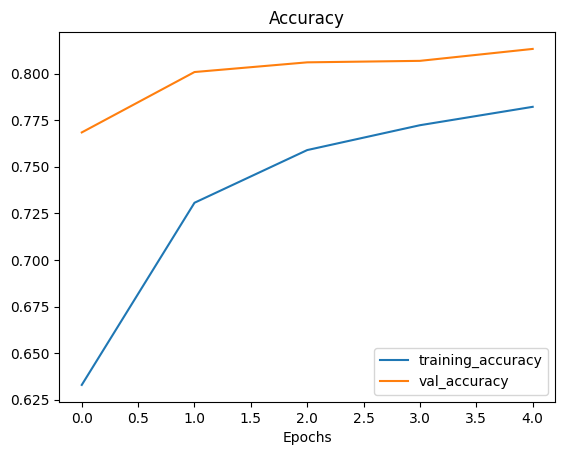

In [59]:
plot_loss_curves(mobilenet_history_all)

In [48]:
inceptionv3_model_all = create_model_with_inceptionv3(num_classes=train_data_all.num_classes)

In [55]:
# Fit the model
inception_history_all = inceptionv3_model_all.fit(train_data_all, epochs=5,
                                                  validation_data=test_data_all,
                                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                                         experiment_name="inception_all")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/inception_all/20241017-222916
Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 163s 636ms/step - accuracy: 0.5117 - loss: 1.4693 - val_accuracy: 0.7720 - val_loss: 0.6802
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 154s 647ms/step - accuracy: 0.7066 - loss: 0.8929 - val_accuracy: 0.7728 - val_loss: 0.6826
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 179s 550ms/step - accuracy: 0.7268 - loss: 0.8265 - val_accuracy: 0.8028 - val_loss: 0.6244
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 546ms/step - accuracy: 0.7402 - loss: 0.7951 - val_accuracy: 0.8080 - val_loss: 0.6194
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 550ms/step - accuracy: 0.7441 - loss: 0.7665 - val_accuracy: 0.7796 - val_loss: 0.6611


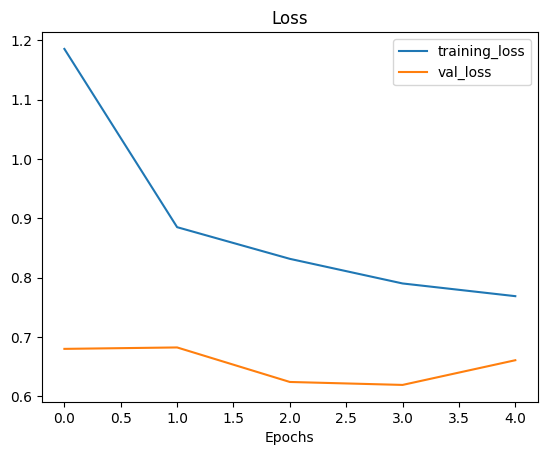

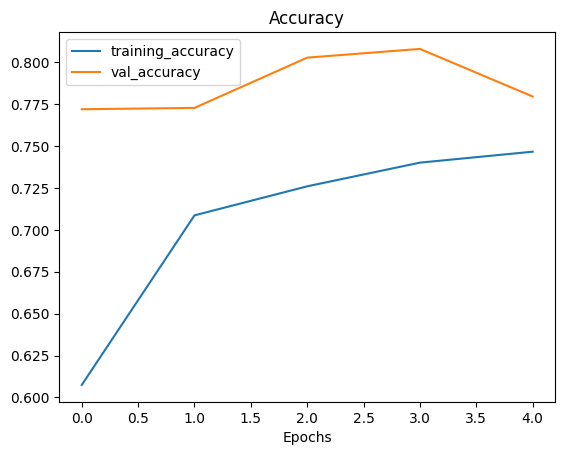

In [56]:
plot_loss_curves(inception_history_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


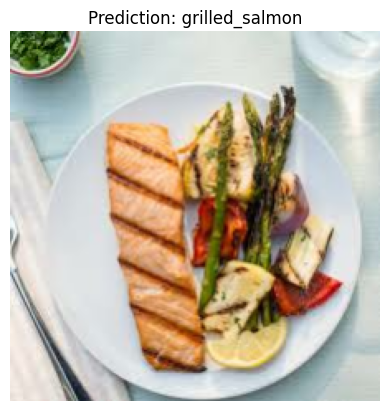

In [88]:
pred_and_plot(model=mobilenetv2_model_all,
              filename="images.jpeg",
              class_names=class_names_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


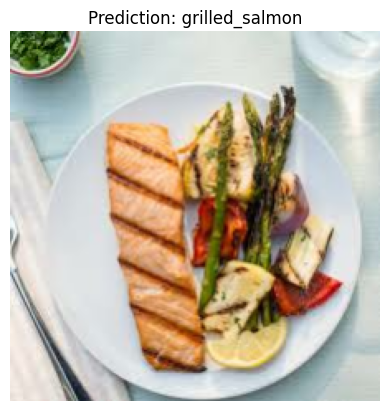

In [89]:
pred_and_plot(model=inceptionv3_model_all,
              filename="images.jpeg",
              class_names=class_names_all)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


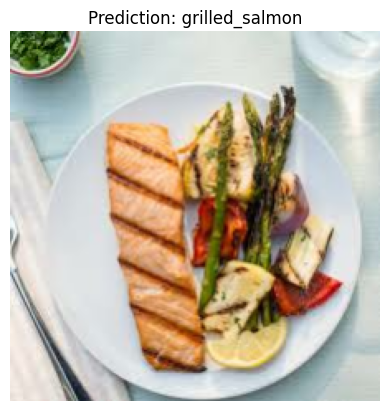

In [90]:
pred_and_plot(model=model1,
              filename="images.jpeg",
              class_names=class_names_all)